# Ready Player Video Game Sales
## 2005 - 2016 Dataset
### Bala Ganapathy, Galan Etie, Beau Nguyen, Trong Nguyen, Taylor Vickers

<img src="Images/videogameconvention.jpg">

# Cleaning Dataset and Formating

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from scipy import stats

pd.set_option('mode.chained_assignment', None)

In [2]:
# import .csv
videogame_data = pd.read_csv("videogame_data.csv")
videogame_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8.0,322.0,Nintendo,E
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,Nintendo,E
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8.0,192.0,Nintendo,E
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,8.5,431.0,Nintendo,E
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,6.6,129.0,Nintendo,E


In [3]:
# count data to verify large enough sample size
len(videogame_data)

7572

In [4]:
# count videogame_data frame to see how far back we want to analyze
videogame_data["Year"].value_counts()

# sory by year so we can get a better picture on the years we want to analyze
videogame_data["Year"].value_counts().sort_index(ascending=False)

2016.0    174
2015.0    307
2014.0    346
2013.0    308
2012.0    345
2011.0    505
2010.0    473
2009.0    619
2008.0    663
2007.0    635
2006.0    557
2005.0    585
2004.0    490
2003.0    516
2002.0    464
2001.0    258
2000.0    107
1999.0     31
1998.0     31
1997.0     18
1996.0      8
1994.0      1
1992.0      1
1988.0      1
1985.0      1
Name: Year, dtype: int64

In [5]:
# create new df so that we don't corrupt the original dataset
analyze_data = videogame_data

In [6]:
# drop NAs
# we dropped NAs because we were missing critics and user scores and wanted to filter those out
analyze_data_cleaned = analyze_data.dropna(how="any")
analyze_data_cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8.0,322.0,Nintendo,E
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,Nintendo,E
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8.0,192.0,Nintendo,E
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,8.5,431.0,Nintendo,E
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,6.6,129.0,Nintendo,E


In [7]:
# verify that drop NAs worked
analyze_data_cleaned["Name"].count()

7359

In [8]:
# create a new data frame to filter usuable years
videogames_current =  analyze_data_cleaned.loc[analyze_data_cleaned["Year"] >= 2005]
videogames_current.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8.0,322.0,Nintendo,E
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,Nintendo,E
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8.0,192.0,Nintendo,E
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,8.5,431.0,Nintendo,E
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,6.6,129.0,Nintendo,E


In [9]:
# verify that our new data frame encompses only data from 2005 - 2016
videogames_current["Year"].value_counts()

# sort by year
videogames_current["Year"].value_counts().sort_index()

2005.0    583
2006.0    552
2007.0    629
2008.0    661
2009.0    614
2010.0    466
2011.0    497
2012.0    336
2013.0    304
2014.0    324
2015.0    295
2016.0    173
Name: Year, dtype: int64

### 1)	Does the genre of a game dictate higher sales in the region (NA, EU, JP) of the world?

In [10]:
# pulling genres to data
videogames_current["Genre"].value_counts()

Action          1425
Sports           749
Shooter          661
Role-Playing     557
Racing           394
Misc             346
Fighting         273
Platform         253
Simulation       241
Adventure        220
Strategy         213
Puzzle           102
Name: Genre, dtype: int64

In [11]:
# group genre 
vg_genre_group = videogames_current.groupby("Genre")
vg_genre_group

In [12]:
# group genre and then sum sales by region 
vg_genre_group_cal = vg_genre_group.sum()[["NA_Sales", "EU_Sales", "JP_Sales"]]
final_group = vg_genre_group_cal.reset_index()
final_group

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,469.50,321.07,54.33
1,Adventure,37.39,24.34,5.74
2,Fighting,90.42,40.62,16.29
3,Misc,208.51,113.19,28.11
4,Platform,125.03,73.33,32.40
5,Puzzle,26.04,21.65,13.76
6,Racing,136.30,111.89,16.21
7,Role-Playing,160.43,83.42,82.02
8,Shooter,358.30,221.13,16.75
9,Simulation,68.55,56.06,19.69


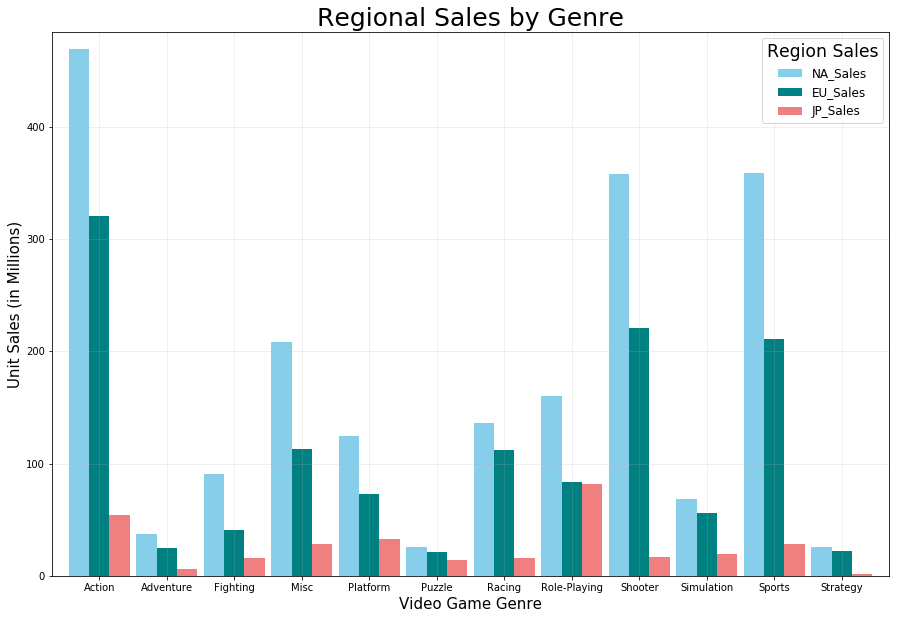

In [13]:
# generate bar chart
# since Sales are in float, I had used arange function for x_axis

x_axis = np.arange(len(final_group['Genre']))
width = 0.3
fig,ax = plt.subplots(figsize=(15,10))

# plot NA Sales
plt.bar(x_axis, final_group['NA_Sales'], color='skyblue', width=width, label=final_group.columns[1], align='center')

# plot EU Sales
plt.bar([p + width for p in x_axis], final_group['EU_Sales'], color='teal', width=width, label=final_group.columns[2], align='center')

# plot JP Sales
plt.bar([p + width*2 for p in x_axis], final_group['JP_Sales'], color='lightcoral', width=width, label=final_group.columns[3], align='center')

# plot formatting
ax.set_title ('Regional Sales by Genre', fontsize =25)
ax.set_xlabel('Video Game Genre', fontsize =15)
ax.set_ylabel('Unit Sales (in Millions)', fontsize =15)
ax.set_xticks([p + width for p in x_axis])
ax.set_xticklabels(final_group['Genre'], rotation=0)

plt.xlim(-0.4, len(x_axis))
plt.ylim([0, max(final_group['NA_Sales'] + 15)])
plt.legend(title="Region Sales", title_fontsize = 'xx-large', fontsize = 'large')
plt.grid(alpha=0.25)
plt.savefig("Images/RegionalSalesGenre.jpg", bbox_inches='tight')
plt.show()

## 1b) How has the popularity of the top selling genre in each region shifted over the years?

### Action Genre - NA and EU

In [14]:
# analyze action genre
# use the videogames_current dataframe
# group by the genre "Action"
action_df = videogames_current.loc[videogames_current["Genre"] == "Action"]
action_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
10,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,97.0,50.0,8.2,3994.0,Rockstar North,M
13,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,97.0,58.0,8.1,3711.0,Rockstar North,M
29,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,97.0,66.0,8.3,2899.0,Rockstar North,M
32,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02,98.0,86.0,7.9,2951.0,Rockstar North,M
37,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57,98.0,64.0,7.5,2833.0,Rockstar North,M


In [15]:
# grouped by release year
# sum by NA_Sales
action_year_combined_NA = action_df.groupby("Year").sum()["NA_Sales"]

# grouped by year
# sum by EU_Sales
action_year_combined_EU = action_df.groupby("Year").sum()["EU_Sales"]

# setting release years as the keys for NA
years = action_year_combined_NA.keys()

### Role-Playing Genre - JP

In [16]:
# analyze role-playing genre
# use the videogames_current dataframe
# group by the genre "role-playing"
rp_df = videogames_current.loc[videogames_current["Genre"] == "Role-Playing"]
rp_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
50,76,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84,96.0,89.0,8.4,3589.0,Bethesda Game Studios,M
59,89,Pok√©mon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84,83.0,46.0,8.5,203.0,Game Freak,E
73,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M
86,127,The Elder Scrolls V: Skyrim,PS3,2011.0,Role-Playing,Bethesda Softworks,2.55,2.71,0.25,1.05,6.56,92.0,16.0,6.4,2527.0,Bethesda Game Studios,M
103,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95,92.0,64.0,7.6,972.0,Square Enix,T


In [17]:
# grouped by year
# sum by JP_Sales
rp_year_combined_JP = rp_df.groupby("Year").sum()["JP_Sales"]

# setting years as the keys for JP
years = rp_year_combined_JP.keys()

### Trend for the Top Selling Genre in Each Region: Action & Role-Playing

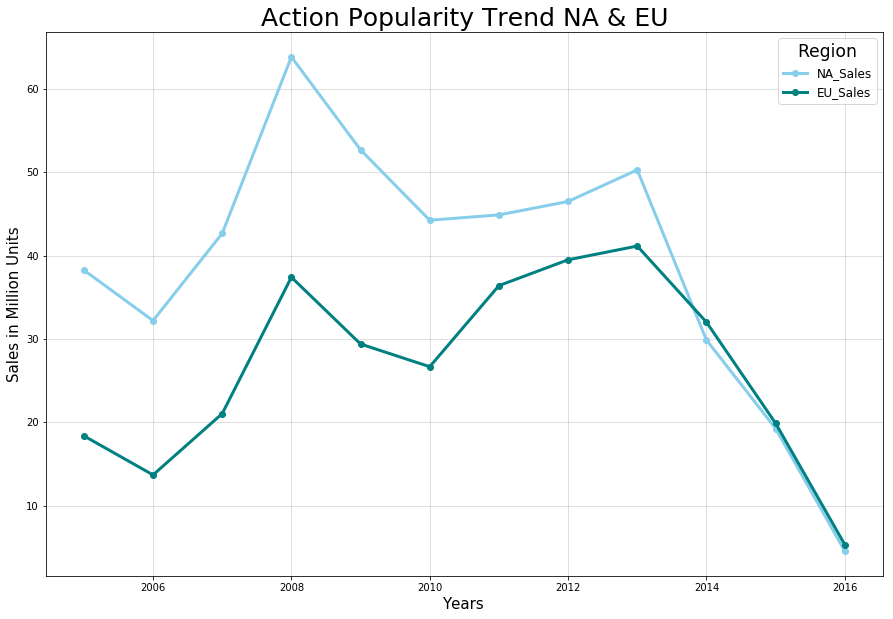

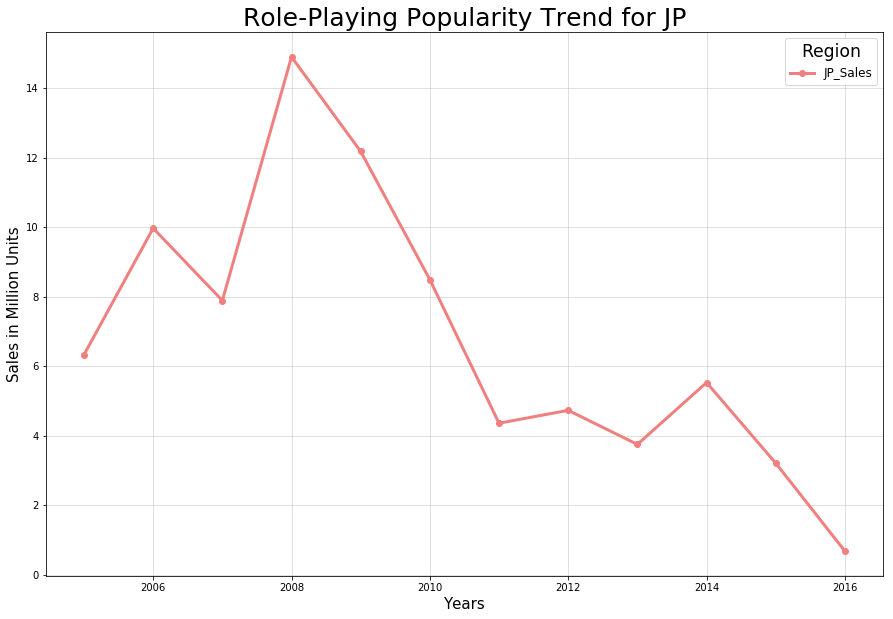

In [18]:
plt.figure(1, figsize=(15,10))
# plotting NA action trend
NA_Action_Trend, = plt.plot(years, action_year_combined_NA, color="skyblue", marker='o', label = "NA_Sales", linewidth=3,)

# plotting EU action trend
EU_Action_Trend, = plt.plot(years, action_year_combined_EU, color="teal", marker='o', label="EU_Sales", linewidth=3,)

# Create a legend for our chart
plt.legend(handles=[NA_Action_Trend, EU_Action_Trend], loc="best", title="Region", title_fontsize = 'xx-large', fontsize = 'large')

plt.title("Action Popularity Trend NA & EU", fontsize =25)
plt.xlabel("Years", fontsize =15)
plt.ylabel("Sales in Million Units", fontsize =15)
plt.grid(alpha=.5)
plt.savefig("Images/PopularityTrendsNAEU.jpg", bbox_inches='tight')

plt.figure(2, figsize=(15,10))
# plotting JP role-playing trend
JP_rp_Trend, = plt.plot(years, rp_year_combined_JP, color="lightcoral", marker='o', label = "JP_Sales", linewidth=3,)

# Create a legend for our chart
plt.legend(handles=[JP_rp_Trend], loc="best", title="Region", title_fontsize = 'xx-large', fontsize = 'large')

plt.title("Role-Playing Popularity Trend for JP", fontsize =25)
plt.xlabel("Years", fontsize =15)
plt.ylabel("Sales in Million Units", fontsize =15)
plt.grid(alpha=.5)
plt.savefig("Images/PopularityTrendsJP.jpg", bbox_inches='tight')

plt.show()

### 2) Do critics scores or user scores correlate with higher sales? 

In [19]:
vg_score_group = vg_genre_group.mean()[['Critic_Score','User_Score']]
score_group = vg_score_group.reset_index()
score_group

,Genre,Critic_Score,User_Score
0,Action,60.976140,6.951298
1,Adventure,56.372727,7.013182
2,Fighting,65.794872,7.121245
3,Misc,60.439306,6.708382
4,Platform,65.482213,7.033992
5,Puzzle,65.803922,7.039216
6,Racing,63.251269,6.730457
7,Role-Playing,69.626571,7.450987
8,Shooter,66.881997,6.872315
9,Simulation,58.385892,6.796266


In [20]:
# merging two data points
vg_score = pd.merge(final_group,vg_score_group,how='inner',on='Genre')
vg_score

,Genre,NA_Sales,EU_Sales,JP_Sales,Critic_Score,User_Score
0,Action,469.50,321.07,54.33,60.976140,6.951298
1,Adventure,37.39,24.34,5.74,56.372727,7.013182
2,Fighting,90.42,40.62,16.29,65.794872,7.121245
3,Misc,208.51,113.19,28.11,60.439306,6.708382
4,Platform,125.03,73.33,32.40,65.482213,7.033992
5,Puzzle,26.04,21.65,13.76,65.803922,7.039216
6,Racing,136.30,111.89,16.21,63.251269,6.730457
7,Role-Playing,160.43,83.42,82.02,69.626571,7.450987
8,Shooter,358.30,221.13,16.75,66.881997,6.872315
9,Simulation,68.55,56.06,19.69,58.385892,6.796266


In [21]:
vg_score['User_Score'] = vg_score['User_Score']*10
vg_score['Sales'] = (vg_score['NA_Sales']+vg_score['EU_Sales']+vg_score['JP_Sales'])
vg_score

,Genre,NA_Sales,EU_Sales,JP_Sales,Critic_Score,User_Score,Sales
0,Action,469.50,321.07,54.33,60.976140,69.512982,844.90
1,Adventure,37.39,24.34,5.74,56.372727,70.131818,67.47
2,Fighting,90.42,40.62,16.29,65.794872,71.212454,147.33
3,Misc,208.51,113.19,28.11,60.439306,67.083815,349.81
4,Platform,125.03,73.33,32.40,65.482213,70.339921,230.76
5,Puzzle,26.04,21.65,13.76,65.803922,70.392157,61.45
6,Racing,136.30,111.89,16.21,63.251269,67.304569,264.40
7,Role-Playing,160.43,83.42,82.02,69.626571,74.509874,325.87
8,Shooter,358.30,221.13,16.75,66.881997,68.723147,596.18
9,Simulation,68.55,56.06,19.69,58.385892,67.962656,144.30


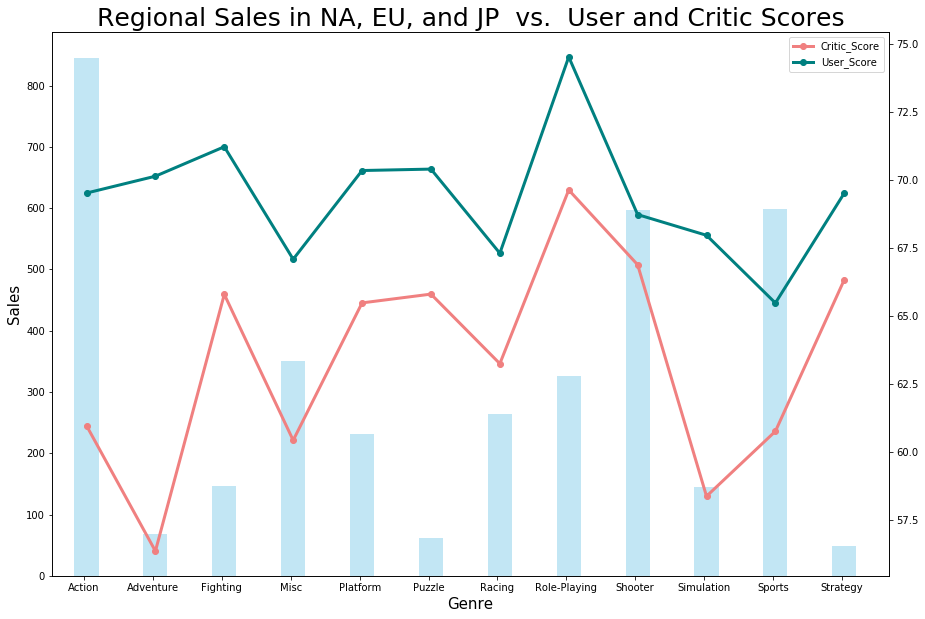

In [22]:
# creating bar and line combined graph
width = .35 # width of a bar
x_axis = np.arange(12)
fig,ax = plt.subplots(figsize=(15,10))
ax = plt.gca()

vg_score['Sales'].plot(kind='bar', width = width, alpha=0.5, color='skyblue')
vg_score['Critic_Score'].plot(secondary_y=True, color="lightcoral", linewidth=3, marker='o')
vg_score['User_Score'].plot(secondary_y=True, color="teal", linewidth=3, marker='o')

plt.xlim([-0.5, len(x_axis)-width])
ax.set_xticklabels((vg_score['Genre']))

ax.set_title ('Regional Sales in NA, EU, and JP  vs.  User and Critic Scores', fontsize =25)
ax.set_xlabel('Genre', fontsize =15)
ax.set_ylabel('User and Critic Score', fontsize =15)
ax.set_ylabel('Sales', fontsize =15)
ax.set_xticks([p - 0.10*width for p in x_axis])
ax.set_xticklabels(final_group['Genre'], rotation=0)

plt.legend()
plt.savefig("Images/RegionalSalesUSCS.jpg", bbox_inches='tight')
plt.show()

### Statistical Analysis

In [23]:
# whether user score and critic score have an impact on sales
vg_df = videogames_current
vg_df['Total_Sales']=(vg_df['NA_Sales']+vg_df['EU_Sales']+vg_df['JP_Sales'])

In [24]:
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8.0,322.0,Nintendo,E,74.28
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,Nintendo,E,32.52
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8.0,192.0,Nintendo,E,30.04
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,8.5,431.0,Nintendo,E,27.11
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,6.6,129.0,Nintendo,E,26.16


In [25]:
vg_action = vg_df.loc[(vg_df['Genre'] =='Action')]
vg_sports = vg_df.loc[(vg_df['Genre'] =='Sports')]
vg_shooter = vg_df.loc[(vg_df['Genre'] =='Shooter')]
vg_platform = vg_df.loc[(vg_df['Genre'] =='Platform')]
vg_action[['Total_Sales','User_Score']].count()

Total_Sales    1425
User_Score     1425
dtype: int64

In [26]:
# computation of data for testing null hypothesis - no relationship exist between user score and total sales
## compute correlation, slope, intercept, p-value and standard error of the variable 
## dependent variable total sales (y), independent variable user score (x)
    # total sales for action genre and user score - y, x variables named as - act_totsls_y,act_usersc_x 
    # total sales for sports genre and user score - y, x variables named as - spt_totsls_y,spt_usersc_x 
    # total sales for shooter genre and user score - y, x variables named as - sht_totsls_y,sht_usersc_x 
# computation of data for testing null hypothesis - no relationship exist between critic score and total sales
## compute correlation, slope, intercept, p-value and standard error of the variable 
## dependent variable total sales (y), independent variable user score (x)
    # total sales for action genre and critic score - y, x variables named as - act_totsls_y,act_critsc_x 
    # total sales for sports genre and critic score - y, x variables named as - spt_totsls_y,spt_critsc_x 
    # total sales for shooter genre and critic score- y, x variables named as - sht_totsls_y,sht_critsc_x 
# in case the null hypothesis is not true, then test similar hypothesis for the Genre across regions - NA, EU and JP
## dependent variable sales (y) for the Genre, independent variable user score (x)
    # NA sales and user score - y, x variables named as - act_NAsals_y,act_usersc_x 
    # EU sales and user score - y, x variables named as - act_EUsals_y,act_usersc_x 
    # JP sales and user score - y, x variables named as - act_JPsals_y,act_usersc_x   

In [27]:
# defining variables from DataFrame - vg_action, vg_sports, vg_shooter, vg_platform
act_totsls_y = vg_action['Total_Sales']
spt_totsls_y = vg_sports['Total_Sales']
sht_totsls_y = vg_shooter['Total_Sales']
plt_totsls_y = vg_platform['Total_Sales']

act_NAsals_y = vg_action['NA_Sales']
act_EUsals_y = vg_action['EU_Sales']
act_JPsals_y = vg_action['JP_Sales']

spt_NAsals_y = vg_sports['NA_Sales']
spt_EUsals_y = vg_sports['EU_Sales']
spt_JPsals_y = vg_sports['JP_Sales']

sht_NAsals_y = vg_shooter['NA_Sales']
sht_EUsals_y = vg_shooter['EU_Sales']
sht_JPsals_y = vg_shooter['JP_Sales']

act_usersc_x = vg_action['User_Score']
spt_usersc_x = vg_sports['User_Score']
sht_usersc_x = vg_shooter['User_Score']
plt_usersc_x = vg_platform['User_Score']

act_critsc_x = vg_action['Critic_Score']
spt_critsc_x = vg_sports['Critic_Score']
sht_critsc_x = vg_shooter['Critic_Score']
plt_critsc_x = vg_platform['Critic_Score']

plt_NAsals_y = vg_platform['NA_Sales']
plt_EUsals_y = vg_platform['EU_Sales']
plt_JPsals_y = vg_platform['JP_Sales']

In [28]:
# Regression data for Action Genre total sales and User score
action_tot_slope,action_tot_int,action_tot_r,action_tot_p,action_tot_std_err = stats.linregress(act_usersc_x,act_totsls_y)
action_tot_fit = action_tot_slope + act_usersc_x*action_tot_int
print("The correlation between User score and Action Genre Total sales is: " + str(action_tot_r))
print("The p-value is " + str(action_tot_p))
print("The standard error is " + str(action_tot_std_err))
if action_tot_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between user score and action genre total sales and \n"
           "accept alternative hypothesis that user score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Action Genre Total sales is: 0.17822875635770433
The p-value is 1.2320020167817434e-11
The standard error is 0.021457085897967364
We reject the null hypothesis that there is no relationship between user score and action genre total sales and 
accept alternative hypothesis that user score may impact total sales


In [29]:
# Regression data for Sports Genre total sales and User score
sports_tot_slope,sports_tot_int,sports_tot_r,sports_tot_p,sports_tot_std_err = stats.linregress(spt_usersc_x,spt_totsls_y)
sports_tot_fit = sports_tot_slope + spt_usersc_x*sports_tot_int
print("The correlation between User score and Sports Genre Total sales is: " + str(sports_tot_r))
print("The p-value is " + str(sports_tot_p))
print("The standard error is " + str(sports_tot_std_err))
if sports_tot_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between user score and sports genre total sales and \n"
           "accept alternative hypothesis that user score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Sports Genre Total sales is: 0.05943744781648139
The p-value is 0.10407812814129279
The standard error is 0.07054898962953271
We do not reject the null hypothesis and additional data analysis required


In [30]:
# Regression data for Shooter Genre total sales and User score
shooter_tot_slope,shooter_tot_int,shooter_tot_r,shooter_tot_p,shooter_tot_std_err = stats.linregress(sht_usersc_x,sht_totsls_y)
shoot_tot_fit = shooter_tot_slope + sht_usersc_x*shooter_tot_int
print("The correlation between User score and Shooter Genre Total sales is: " + str(shooter_tot_r))
print("The p-value is " + str(shooter_tot_p))
print("The standard error is " + str(shooter_tot_std_err))
if shooter_tot_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between user score and shooter genre total sales and \n"
           "accept alternative hypothesis that user score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Shooter Genre Total sales is: -0.0451470251235002
The p-value is 0.2464070481217168
The standard error is 0.04599723092066435
We do not reject the null hypothesis and additional data analysis required


In [31]:
# Regression data for Action Genre total sales and Critic score
act_tot_crit_slope,act_tot_crit_int,act_tot_crit_r,act_tot_crit_p,act_tot_crit_std_err = stats.linregress(act_critsc_x,act_totsls_y)
act_tot_crit_fit = act_tot_crit_slope + act_critsc_x*act_tot_crit_int
print("The correlation between Critic score and Action Genre Total sales is: " + str(act_tot_crit_r))
print("The p-value is " + str(act_tot_crit_p))
print("The standard error is " + str(act_tot_crit_std_err))
if act_tot_crit_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between critic score and action genre total sales and \n"
           "accept alternative hypothesis that critic score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between Critic score and Action Genre Total sales is: 0.2927154119370396
The p-value is 1.5004586343303273e-29
The standard error is 0.0011725685087788918
We reject the null hypothesis that there is no relationship between critic score and action genre total sales and 
accept alternative hypothesis that critic score may impact total sales


In [32]:
# Regression data for Sports Genre total sales and Critic score
spt_tot_crit_slope,spt_tot_crit_int,spt_tot_crit_r,spt_tot_crit_p,spt_tot_crit_std_err = stats.linregress(spt_critsc_x,spt_totsls_y)
spt_tot_crit_fit = spt_tot_crit_slope + spt_critsc_x*spt_tot_crit_int
print("The correlation between Critic score and Sports Genre Total sales is: " + str(spt_tot_crit_r))
print("The p-value is " + str(spt_tot_crit_p))
print("The standard error is " + str(spt_tot_crit_std_err))
if spt_tot_crit_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between critic score and sports genre total sales and \n"
           "accept alternative hypothesis that critic score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between Critic score and Sports Genre Total sales is: 0.08695083213095735
The p-value is 0.017303552407851214
The standard error is 0.003989077866934328
We reject the null hypothesis that there is no relationship between critic score and sports genre total sales and 
accept alternative hypothesis that critic score may impact total sales


In [33]:
# Regression data for Shooter Genre total sales and Critic score
sht_tot_crit_slope,sht_tot_crit_int,sht_tot_crit_r,sht_tot_crit_p,sht_tot_crit_std_err = stats.linregress(sht_critsc_x,sht_totsls_y)
sht_tot_crit_fit = sht_tot_crit_slope + sht_critsc_x*sht_tot_crit_int
print("The correlation between Critic score and Shooter Genre Total sales is: " + str(sht_tot_crit_r))
print("The p-value is " + str(sht_tot_crit_p))
print("The standard error is " + str(sht_tot_crit_std_err))

if sht_tot_crit_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between critic score and shooter genre total sales and \n"
           "accept alternative hypothesis that critic score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between Critic score and Shooter Genre Total sales is: 0.2777421919465169
The p-value is 3.575180802165388e-13
The standard error is 0.003112518027917654
We reject the null hypothesis that there is no relationship between critic score and shooter genre total sales and 
accept alternative hypothesis that critic score may impact total sales


In [34]:
# Regression data for Action Genre NA sales and User score
action_NA_slope,action_NA_int,action_NA_r,action_NA_p,action_NA_std_err = stats.linregress(act_usersc_x,act_NAsals_y)
action_NA_fit = action_NA_slope + act_usersc_x*action_NA_int
print("The correlation between User score and Action Genre NA sales is: " + str(action_NA_r))
print("The p-value is " + str(action_NA_p))
print("The standard error is " + str(action_NA_std_err))
if action_NA_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between user score and NA sales of \n"
           "Action Genre and accept alternative hypothesis that user score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Action Genre NA sales is: 0.1800101249787527
The p-value is 7.633733142354418e-12
The standard error is 0.011865705650246885
We reject the null hypothesis that there is no relationship between user score and NA sales of 
Action Genre and accept alternative hypothesis that user score may impact total sales


In [35]:
# Regression data for Action Genre EU sales and User score
action_EU_slope,action_EU_int,action_EU_r,action_EU_p,action_EU_std_err = stats.linregress(act_usersc_x,act_EUsals_y)
action_EU_fit = action_EU_slope + act_usersc_x*action_EU_int
print("The correlation between User score and Action Genre EU sales is: " + str(action_EU_r))
print("The p-value is " + str(action_EU_p))
print("The standard error is " + str(action_EU_std_err))
if action_EU_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between user score and EU sales  \n"
           "of Action Genre and accept alternative hypothesis that user score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Action Genre EU sales is: 0.1311780887964182
The p-value is 6.729747974317005e-07
The standard error is 0.009830643634281792
We reject the null hypothesis that there is no relationship between user score and EU sales  
of Action Genre and accept alternative hypothesis that user score may impact total sales


In [36]:
# Regression data for Action Genre JP sales and User score
action_JP_slope,action_JP_int,action_JP_r,action_JP_p,action_JP_std_err = stats.linregress(act_usersc_x,act_JPsals_y)
action_JP_fit = action_JP_slope + act_usersc_x*action_JP_int
print("The correlation between User score and Action Genre JP sales is: " + str(action_JP_r))
print("The p-value is " + str(action_JP_p))
print("The standard error is " + str(action_JP_std_err))
if action_JP_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between user score and JP sales  \n"
           "of Action Genre and accept alternative hypothesis that user score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Action Genre JP sales is: 0.18732784141577483
The p-value is 1.0149885830430726e-12
The standard error is 0.0021723364288250874
We reject the null hypothesis that there is no relationship between user score and JP sales  
of Action Genre and accept alternative hypothesis that user score may impact total sales


In [37]:
# Regression data for Action Genre NA sales and Critic score
act_NA_crit_slope,act_NA_crit_int,act_NA_crit_r,act_NA_crit_p,act_NA_crit_std_err = stats.linregress(act_critsc_x,act_NAsals_y)
act_NA_crit_fit = act_NA_crit_slope + act_critsc_x*act_NA_crit_int
print("The correlation between User score and Total sales is: " + str(act_NA_crit_r))
print("The p-value is " + str(act_NA_crit_p))
print("The standard error is " + str(act_NA_crit_std_err))
if act_NA_crit_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between critic score and NA sales  \n"
           "of Action Genre and accept alternative hypothesis that critic score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Total sales is: 0.2787913546769982
The p-value is 7.494901357892998e-27
The standard error is 0.0006514573248160633
We reject the null hypothesis that there is no relationship between critic score and NA sales  
of Action Genre and accept alternative hypothesis that critic score may impact total sales


In [38]:
# Regression data for Sports Genre NA sales and Critic score
spt_NA_crit_slope,spt_NA_crit_int,spt_NA_crit_r,spt_NA_crit_p,spt_NA_crit_std_err = stats.linregress(spt_critsc_x,spt_NAsals_y)
spt_NA_crit_fit = spt_NA_crit_slope + spt_critsc_x*spt_NA_crit_int
print("The correlation between User score and Total sales is: " + str(spt_NA_crit_r))
print("The p-value is " + str(spt_NA_crit_p))
print("The standard error is " + str(spt_NA_crit_std_err))
if spt_NA_crit_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between critic score and NA sales of  \n"
           "Sports Genre and accept alternative hypothesis that critic score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Total sales is: 0.09457388690389648
The p-value is 0.009604032242263326
The standard error is 0.0021847772763131925
We reject the null hypothesis that there is no relationship between critic score and NA sales of  
Sports Genre and accept alternative hypothesis that critic score may impact total sales


In [39]:
# Regression data for Shooter Genre NA sales and Critic score
sht_NA_crit_slope,sht_NA_crit_int,sht_NA_crit_r,sht_NA_crit_p,sht_NA_crit_std_err = stats.linregress(sht_critsc_x,sht_NAsals_y)
sht_NA_crit_fit = sht_NA_crit_slope + sht_critsc_x*sht_NA_crit_int
print("The correlation between User score and Total sales is: " + str(sht_NA_crit_r))
print("The p-value is " + str(sht_NA_crit_p))
print("The standard error is " + str(sht_NA_crit_std_err))

if sht_NA_crit_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between critic score and NA sales of  \n"
           "Shooter Genre and accept alternative hypothesis that critic score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Total sales is: 0.26963663650299663
The p-value is 1.7865458787544047e-12
The standard error is 0.0019991701116496997
We reject the null hypothesis that there is no relationship between critic score and NA sales of  
Shooter Genre and accept alternative hypothesis that critic score may impact total sales


In [40]:
# Regression data for Platform Genre NA sales and Critic score
plt_NA_crit_slope,plt_NA_crit_int,plt_NA_crit_r,plt_NA_crit_p,plt_NA_crit_std_err = stats.linregress(plt_critsc_x,plt_NAsals_y)
plt_NA_crit_fit = plt_NA_crit_slope + plt_critsc_x*plt_NA_crit_int
print("The correlation between User score and Total sales is:" + str(plt_NA_crit_r))
print("The p-value is " + str(plt_NA_crit_p))
print("The standard error is " + str(plt_NA_crit_std_err))

if plt_NA_crit_p<=0.05:
    print("We reject the null hypothesis that there is no relationship between critic score and NA sales of  \n"
           "Platform Genre and accept alternative hypothesis that critic score may impact total sales")
else:
    print("We do not reject the null hypothesis and additional data analysis required")

The correlation between User score and Total sales is:0.2264610860266958
The p-value is 0.0002817359727704547
The standard error is 0.0038737193324642387
We reject the null hypothesis that there is no relationship between critic score and NA sales of  
Platform Genre and accept alternative hypothesis that critic score may impact total sales


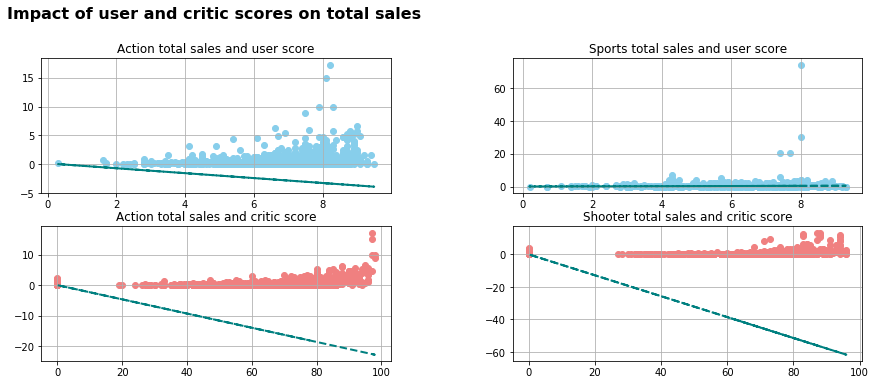

In [41]:
# plots for user score and crtic score on total sales
plt.subplots(nrows=3,ncols=2, sharex=True)
plt.suptitle("Impact of user and critic scores on total sales", fontsize = 16, fontweight='bold')

plt.subplot(221)
plt.scatter(act_usersc_x,act_totsls_y,marker='o',color='skyblue')
plt.plot(act_usersc_x,action_tot_fit, color='teal', linestyle='dashed', linewidth=2)
plt.title('Action total sales and user score')
plt.grid(True)

plt.subplot(222)
plt.scatter(spt_usersc_x,spt_totsls_y,marker='o',color='skyblue')
plt.plot(spt_usersc_x,sports_tot_fit,color='teal', linestyle='dashed', linewidth=2)
plt.title('Sports total sales and user score')
plt.grid(True)

plt.subplot(223)
plt.scatter(act_critsc_x,act_totsls_y,marker='o',color='lightcoral')
plt.plot(act_critsc_x,act_tot_crit_fit, color='teal', linestyle='dashed', linewidth=2)
plt.title('Action total sales and critic score')
plt.grid(True)

plt.subplot(224)
plt.scatter(sht_critsc_x,sht_totsls_y,marker='o',color='lightcoral')
plt.plot(sht_critsc_x,sht_tot_crit_fit, color='teal', linestyle='dashed', linewidth=2)
plt.title('Shooter total sales and critic score')
plt.grid(True)

plt.subplots_adjust(top=0.8, bottom=-0.25, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)
plt.savefig("Images/USCSImpactSales.jpg", bbox_inches='tight')
plt.show()

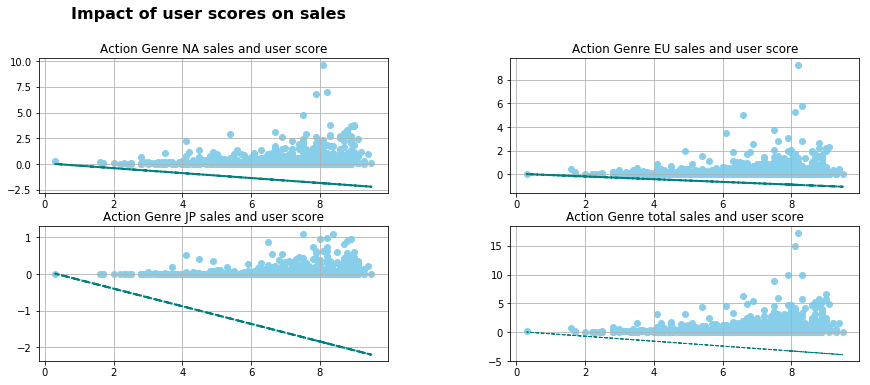

In [42]:
action_NA_slope,action_NA_int,action_NA_r,action_NA_p,action_NA_std_err = stats.linregress(act_usersc_x,act_NAsals_y)
action_NA_fit = action_NA_slope + act_usersc_x*action_NA_int

# plots for Action Genre and user score on NA, EU, JP and total sales
plt.subplots(nrows=3,ncols=2, sharex=True)
plt.suptitle("Impact of user scores on sales ", fontsize = 16, fontweight='bold')

plt.subplot(221)
plt.scatter(act_usersc_x,act_NAsals_y,marker='o',color='skyblue')
plt.plot(act_usersc_x,action_NA_fit, color='teal', linestyle='dashed', linewidth=2)
plt.title('Action Genre NA sales and user score')
plt.grid(True)

plt.subplot(222)
plt.scatter(act_usersc_x,act_EUsals_y,marker='o',color='skyblue')
plt.plot(act_usersc_x,action_EU_fit, color='teal', linestyle='dashed', linewidth=2)
plt.title('Action Genre EU sales and user score')
plt.grid(True)

plt.subplot(223)
plt.scatter(act_usersc_x,act_JPsals_y,marker='o',color='skyblue')
plt.plot(act_usersc_x,action_NA_fit,color='teal', linestyle='dashed', linewidth=2)
plt.title('Action Genre JP sales and user score')
plt.grid(True)

plt.subplot(224)
plt.scatter(act_usersc_x,act_totsls_y,marker='o',color='skyblue')
plt.plot(act_usersc_x,action_tot_fit, color='teal', linestyle='dashed', linewidth=1)
plt.title('Action Genre total sales and user score')
plt.grid(True)

plt.subplots_adjust(top=0.8, bottom=-0.25, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)
plt.savefig("Images/UScoreImpactsales.jpg", bbox_inches='tight')
plt.show()

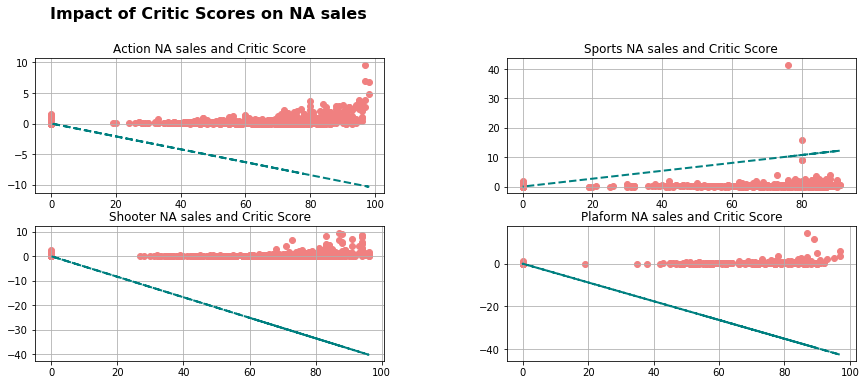

In [43]:
# plots for crtic score on NA sales for Action, Sports, Shooter and Platform Genre
plt.subplots(nrows=3,ncols=2, sharex=True)
plt.suptitle("Impact of Critic Scores on NA sales", fontsize = 16, fontweight='bold')

plt.subplot(221)
plt.scatter(act_critsc_x,act_NAsals_y,marker='o',color='lightcoral')
plt.plot(act_critsc_x,act_NA_crit_fit,color='teal', linestyle='dashed', linewidth=2)
plt.title('Action NA sales and Critic Score')
plt.grid(True)

plt.subplot(222)
plt.scatter(spt_critsc_x,spt_NAsals_y,marker='o',color='lightcoral')
plt.plot(spt_critsc_x,spt_NA_crit_fit,color='teal', linestyle='dashed', linewidth=2)
plt.title('Sports NA sales and Critic Score')
plt.grid(True)

plt.subplot(223)
plt.scatter(sht_critsc_x,sht_NAsals_y,marker='o',color='lightcoral')
plt.plot(sht_critsc_x,sht_NA_crit_fit,color='teal', linestyle='dashed', linewidth=2)
plt.title('Shooter NA sales and Critic Score')
plt.grid(True)

plt.subplot(224)
plt.scatter(plt_critsc_x,plt_NAsals_y,marker='o',color='lightcoral')
plt.plot(plt_critsc_x,plt_NA_crit_fit,color='teal',linestyle='dashed', linewidth=2)
plt.title('Plaform NA sales and Critic Score')
plt.grid(True)

plt.subplots_adjust(top=0.8, bottom=-0.25, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)
plt.savefig("Images/CSNAImpactsales.jpg", bbox_inches='tight')
plt.show()

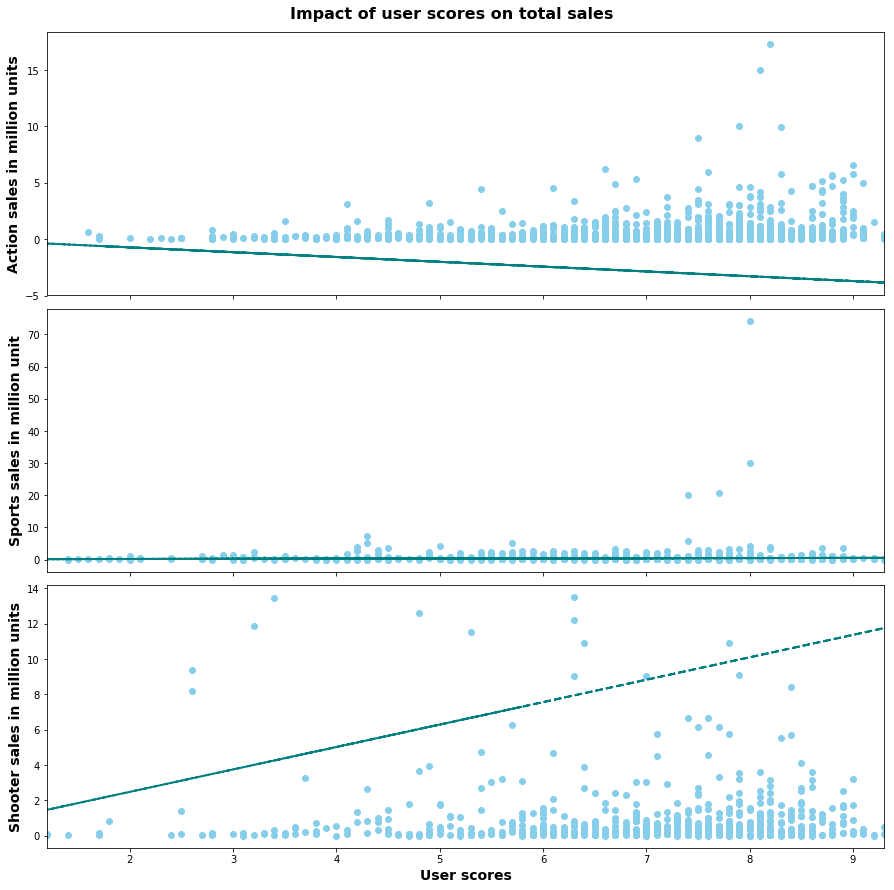

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, figsize = (15,15))
fig.suptitle("Impact of user scores on total sales", y=.89, verticalalignment='bottom', fontsize = 16, fontweight='bold')

ax1.set_xlim(min(act_usersc_x), max(act_usersc_x))
ax1.scatter(act_usersc_x,act_totsls_y,marker='o',color='skyblue')
ax1.plot(act_usersc_x,action_tot_fit, color='teal', linestyle='dashed',linewidth=2)
ax1.set_ylabel("Action sales in million units",fontsize=14, fontweight='bold')

ax2.set_xlim(min(spt_usersc_x), max(spt_usersc_x))
ax2.scatter(spt_usersc_x,spt_totsls_y,marker='o',color='skyblue')
ax2.plot(spt_usersc_x,sports_tot_fit, color='teal', linestyle='dashed',linewidth=2)
ax2.set_ylabel("Sports sales in million unit",fontsize=14, fontweight='bold')

ax3.set_xlim(min(sht_usersc_x), max(sht_usersc_x))
ax3.scatter(sht_usersc_x,sht_totsls_y,marker='o',color='skyblue')
ax3.plot(sht_usersc_x,shoot_tot_fit, color='teal', linestyle='dashed',linewidth=2)
ax3.set_ylabel("Shooter sales in million units",fontsize=14, fontweight='bold')
ax3.set_xlabel("User scores",fontsize=14, fontweight='bold')

fig.subplots_adjust(hspace = 0.05)
plt.savefig("Images/USImpactScoresLarge.jpg", bbox_inches='tight')
plt.show()

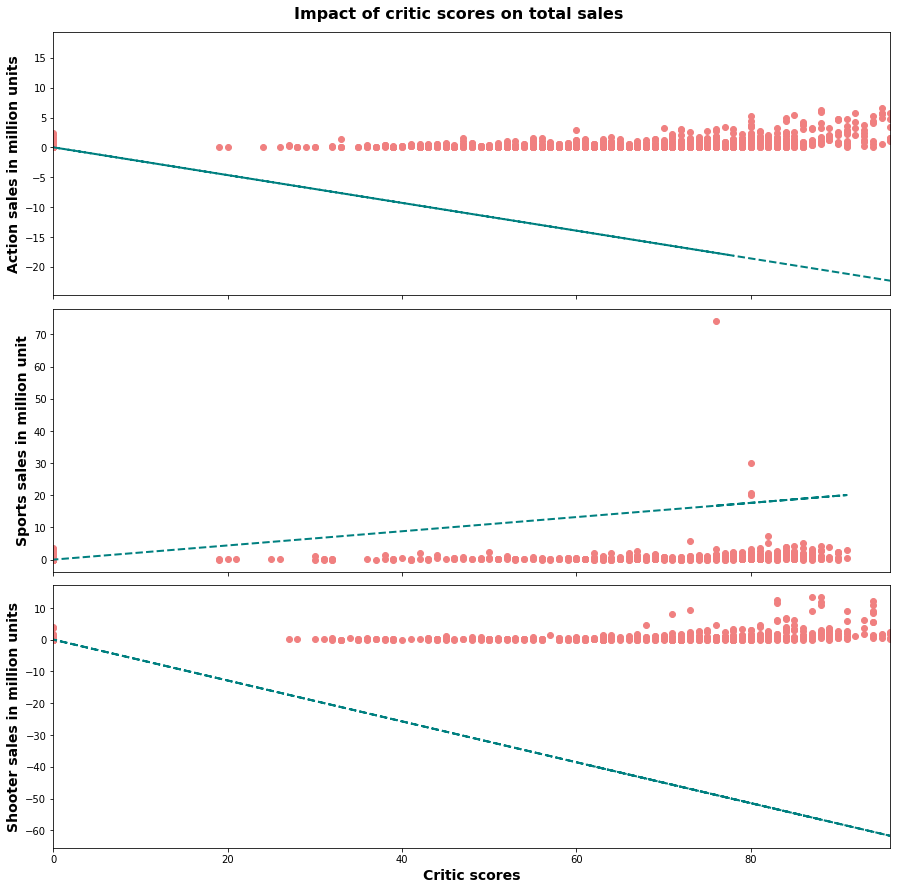

In [45]:
fig2, (ax4,ax5,ax6) = plt.subplots(3, sharex=True, figsize = (15,15))
fig2.suptitle("Impact of critic scores on total sales", y=.89, verticalalignment='bottom', fontsize = 16, fontweight='bold')

ax4.set_xlim(min(act_critsc_x), max(act_critsc_x))
ax4.scatter(act_critsc_x,act_totsls_y,marker='o',color='lightcoral')
ax4.plot(act_critsc_x,act_tot_crit_fit, color='teal', linestyle='dashed',linewidth=2)
ax4.set_ylabel("Action sales in million units",fontsize=14, fontweight='bold')

ax5.set_xlim(min(spt_critsc_x), max(spt_critsc_x))
ax5.scatter(spt_critsc_x,spt_totsls_y,marker='o',color='lightcoral')
ax5.plot(spt_critsc_x,spt_tot_crit_fit, color='teal', linestyle='dashed',linewidth=2)
ax5.set_ylabel("Sports sales in million unit",fontsize=14, fontweight='bold')

ax6.set_xlim(min(sht_critsc_x), max(sht_critsc_x))
ax6.scatter(sht_critsc_x,sht_totsls_y,marker='o',color='lightcoral')
ax6.plot(sht_critsc_x,sht_tot_crit_fit, color='teal', linestyle='dashed',linewidth=2)
ax6.set_ylabel("Shooter sales in million units",fontsize=14, fontweight='bold')
ax6.set_xlabel("Critic scores",fontsize=14, fontweight='bold')

fig2.subplots_adjust(hspace = 0.05)
plt.savefig("Images/CSImpactScoresLarge.jpg", bbox_inches='tight')
plt.show()